In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.models import Sequential

In [13]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [17]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [23]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [25]:
print(X_train[10].shape)

(28, 28)


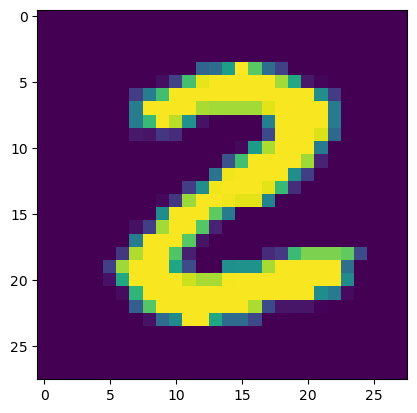

2


In [33]:
plt.imshow(X_train[25])
plt.show()
print(Y_train[25])

In [35]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [37]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [39]:
X_train = X_train/255
X_test = X_test/255

In [41]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [45]:


model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),  
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [47]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8513 - loss: 0.5168
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9526 - loss: 0.1555
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9660 - loss: 0.1128
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9729 - loss: 0.0893
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9775 - loss: 0.0720
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9813 - loss: 0.0609
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9842 - loss: 0.0508
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9865 - loss: 0.0429
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9892 - loss: 0.0360
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0322


In [51]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.1205
0.9745000004768372


In [53]:
print(X_test.shape)

(10000, 28, 28)


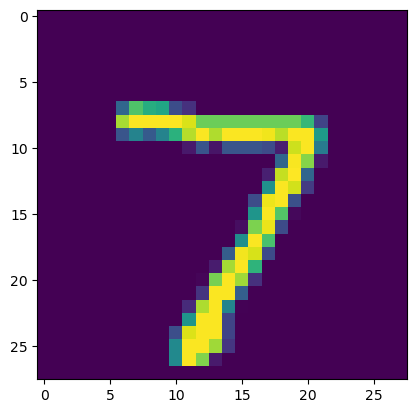

In [55]:
plt.imshow(X_test[0])
plt.show()

In [57]:
print(Y_test[0])

7


In [59]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [61]:
print(Y_pred.shape)

(10000, 10)


In [63]:
print(Y_pred[0])

[1.6051769e-02 7.1042478e-02 2.1020472e-03 9.4719815e-01 2.2442835e-06
 9.2676753e-04 1.8474055e-09 9.9999994e-01 4.3023236e-02 9.8932803e-01]


In [65]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [67]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [71]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [73]:
print(conf_mat)

tf.Tensor(
[[ 965    0    0    3    2    2    0    2    2    4]
 [   0 1124    1    4    0    1    2    1    2    0]
 [   3    0 1009    6    2    0    2    8    2    0]
 [   0    0    3  991    0    3    0    4    3    6]
 [   0    0    5    0  961    1    3    3    1    8]
 [   2    0    0   22    1  854    6    1    3    3]
 [   2    2    3    2    3    4  940    1    1    0]
 [   1    1    5    6    1    0    0 1003    4    7]
 [   2    3    5   24    5    6    5    4  917    3]
 [   1    2    0    6   11    1    0    6    4  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

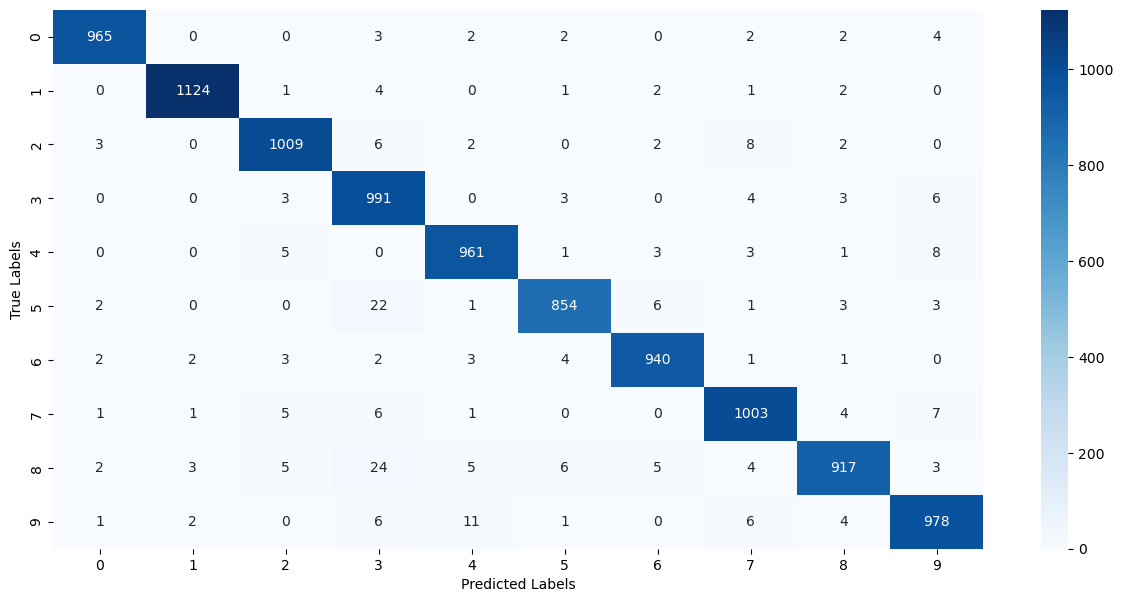

In [75]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [85]:
input_image_path = 'input_image.png'

input_image = cv2.imread(input_image_path)

In [87]:
type(input_image)

numpy.ndarray

In [89]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


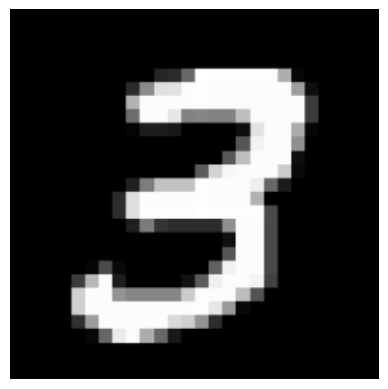

In [99]:
image = cv2.imread('input_image.png')  # example image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format for display

# Displaying image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [101]:
input_image.shape

(391, 390, 3)

In [103]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [105]:
grayscale.shape

(391, 390)

In [107]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [109]:
input_image_resize.shape

(28, 28)

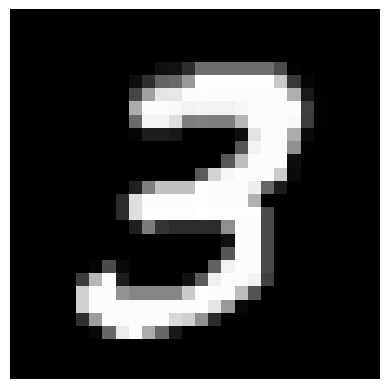

In [113]:
input_image_rgb = cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [115]:
input_image_resize = input_image_resize/255

In [117]:
type(input_image_resize)

numpy.ndarray

In [119]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [121]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[5.4271621e-10 4.0670646e-05 3.8710123e-04 1.0000000e+00 2.5760303e-14
  1.0993317e-02 1.2294809e-16 1.0137790e-06 4.2290817e-04 9.8552787e-01]]


In [123]:
input_pred_label = np.argmax(input_prediction)

In [125]:
print(input_pred_label)

3


Path of the image to be predicted:  input_image.png


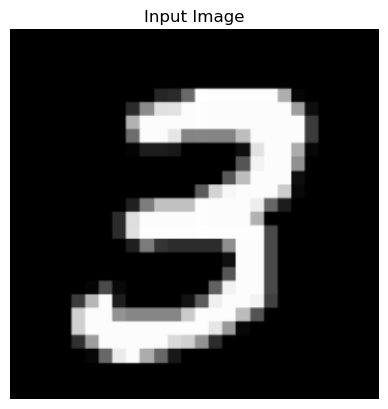

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The Handwritten Digit is recognised as 3


In [143]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Input the path of the image
input_image_path = input('Path of the image to be predicted: ')

# Open the image using PIL
input_image = Image.open(input_image_path)

# Display the image using matplotlib
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

# Convert the image to grayscale
grayscale = input_image.convert('L')

# Resize the image to 28x28 pixels
input_image_resize = grayscale.resize((28, 28))

# Normalize the image data to 0-1 range
input_image_resize = np.array(input_image_resize) / 255.0

# Reshape the image to match the input shape of the model
image_reshaped = np.reshape(input_image_resize, (1, 28, 28))

# Predict the digit using the model
input_prediction = model.predict(image_reshaped)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Print the result
print('The Handwritten Digit is recognised as', input_pred_label)
